# IF3170 Artificial Intelligence | Tugas Besar 1
Notebook ini digunakan untuk pengujian terhadap implementasi model FFNN.

Nomor Kelompok: 57

Anggota Kelompok:
- Aland Mulia Pratama (13522124)
- Christian Justin Hendrawan (13522135)
- Albert Ghazaly (13522150)

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.datasets import fetch_openml
from sklearn.utils import check_random_state
from sklearn.datasets import load_iris
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from ffnn.model import FFNN

## Memuat Dataset

In [123]:
# JANGAN DIHAPUS !!
# # Memuat dataset MNIST
# X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False, parser="auto")

# # Mengacak data
# random_state = check_random_state(0)
# permutation = random_state.permutation(X.shape[0])
# X = X[permutation]
# y = y[permutation]

# # Mengubah data ke dalam bentuk DataFrame
# data_df = pd.DataFrame(X, columns=[f'pixel_{i}' for i in range(X.shape[1])])
# data_df['label'] = y

# # Menampilkan 5 baris pertama dari dataset
# print(data_df.head())


# Memuat dataset Iris
iris = load_iris()
X, y = iris.data, iris.target

# Mengacak data
X, y = shuffle(X, y, random_state=1)

# Mengubah data ke dalam bentuk DataFrame
data_df = pd.DataFrame(X, columns=iris.feature_names)
data_df['label'] = y

# Menampilkan 5 baris pertama dari dataset
print(data_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.8               4.0                1.2               0.2   
1                5.1               2.5                3.0               1.1   
2                6.6               3.0                4.4               1.4   
3                5.4               3.9                1.3               0.4   
4                7.9               3.8                6.4               2.0   

   label  
0      0  
1      1  
2      1  
3      0  
4      2  


# 1. Analisis Data Eksplorasi (EDA)

Analisis Data Eksplorasi (EDA) adalah langkah penting dalam proses analisis data yang melibatkan pemeriksaan dan visualisasi kumpulan data untuk menemukan pola, tren, anomali, dan wawasan. EDA merupakan langkah awal sebelum menerapkan teknik statistik dan pembelajaran mesin yang lebih lanjut. EDA membantu Anda memahami data secara mendalam, memungkinkan Anda membuat keputusan yang tepat dan merumuskan hipotesis untuk analisis lebih lanjut.

In [124]:
# 1. Statistik Dasar dan Informasi

print("Dimensi Dataset:\n", data_df.shape)

print("\nNama Fitur:")
print(data_df.columns.tolist())

print("\nNama Fitur dan Tipe Datanya:\n")
for column, dtype in data_df.dtypes.items():
    print(f"{column}: {dtype}")

print("\nStatistik Dasar Dataset:")
print(data_df.describe())

print("\nDistribusi Label Dataset:")
print(data_df['label'].value_counts())


Dimensi Dataset:
 (150, 5)

Nama Fitur:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'label']

Nama Fitur dan Tipe Datanya:

sepal length (cm): float64
sepal width (cm): float64
petal length (cm): float64
petal width (cm): float64
label: int32

Statistik Dasar Dataset:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)       label  
count        150.000000  150.000000  
mean           1.199333    1.0

In [70]:
# 2. Mengecek nilai yang hilang
print("Nilai Hilang:\n")
print(data_df.isnull().sum())

Nilai Hilang:

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
label                0
dtype: int64


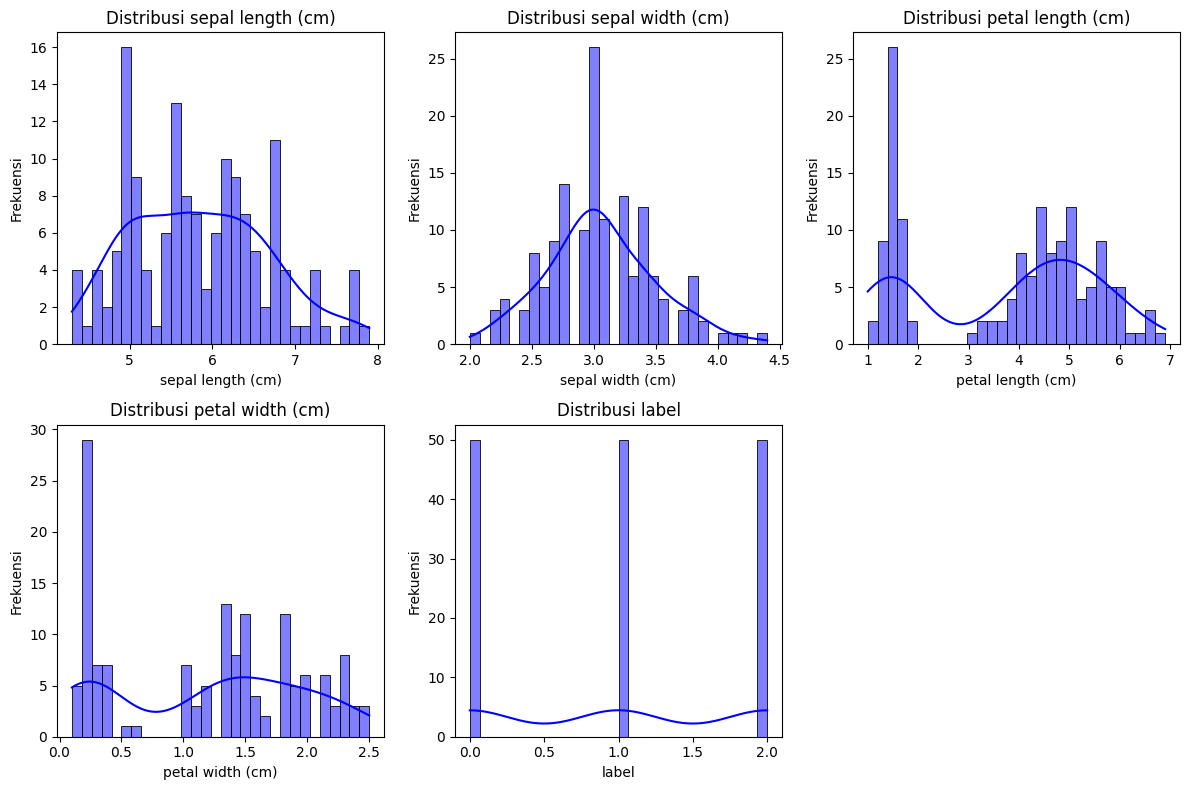

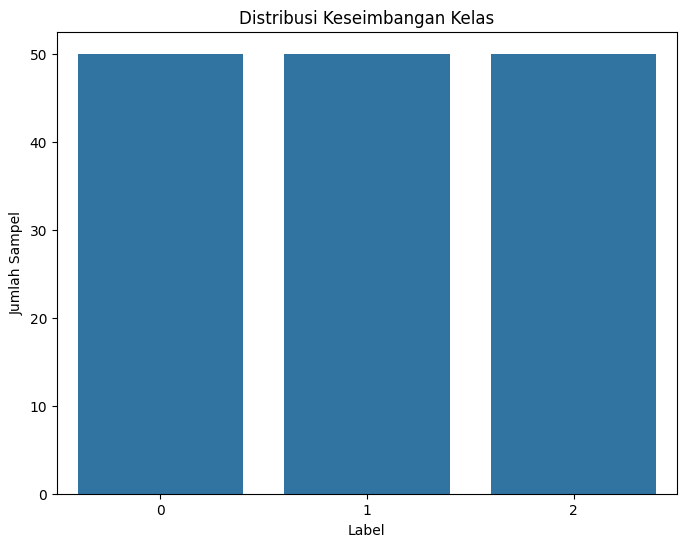

In [125]:
# 3. Visualisasi Data

# 1. Distribusi Fitur (Contoh beberapa fitur)
plt.figure(figsize=(12, 8))
for i, feature in enumerate(data_df.columns, start=1):
    plt.subplot(2, 3, i)
    sns.histplot(data_df[feature], kde=True, bins=30, color='blue')
    plt.title(f'Distribusi {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

# 2. Keseimbangan Kelas (Distribusi Label)
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=data_df)
plt.title('Distribusi Keseimbangan Kelas')
plt.xlabel('Label')
plt.ylabel('Jumlah Sampel')
plt.show()

# 2. Membagi Set Pelatihan dan Validasi

Membagi set pelatihan dan validasi berfungsi sebagai langkah diagnostik awal untuk menilai kinerja model yang kita latih. Pembagian ini dilakukan sebelum langkah pra-pemrosesan untuk menghindari kebocoran data antar set. Jika Anda ingin menggunakan k-fold cross-validation, bagilah data nanti dan lakukan pembersihan serta pra-pemrosesan secara terpisah untuk setiap pembagian.

In [126]:
# Membagi dataset menjadi set pelatihan dan validasi
X_train, X_test, y_train_raw, y_test_raw = train_test_split(X, y, test_size=0.2, random_state=42)

# One-hot encoding setelah pembagian
encoder = OneHotEncoder(sparse_output=False)
y_train = encoder.fit_transform(y_train_raw.reshape(-1, 1))
y_test = encoder.transform(y_test_raw.reshape(-1, 1))

# Menampilkan informasi tentang set pelatihan dan validasi
print("X_train shape:", X_train.shape)  # (56000, 784)
print("X_test shape:", X_test.shape)    # (14000, 784)
print("y_train shape:", y_train.shape)  # (56000, 2)
print("y_test shape:", y_test.shape)    # (14000, 2)

X_train shape: (120, 4)
X_test shape: (30, 4)
y_train shape: (120, 3)
y_test shape: (30, 3)


# 3. Pengujian Terhadap Implementasi FFNN (Feed Forward Neural Network)

Analisis ini bertujuan mengevaluasi pengaruh berbagai hyperparameter pada kinerja model FFNN. Pertama, dilakukan analisis pengaruh jumlah layer (depth) dan jumlah neuron per layer (width) terhadap hasil prediksi dan grafik loss pelatihan. Kedua, diuji pengaruh fungsi aktivasi hidden layer (kecuali softmax) pada hasil prediksi, grafik loss, serta distribusi bobot dan gradien. Ketiga, dilakukan analisis variasi learning rate untuk membandingkan hasil prediksi, grafik loss, dan distribusi bobot atau gradien. Keempat, pengaruh metode inisialisasi bobot dianalisis dengan membandingkan hasil prediksi, grafik loss, serta distribusi parameter. Terakhir, hasil prediksi model dibandingkan dengan library sklearn MLP menggunakan hyperparameter yang sama untuk menilai perbedaan kinerja.

In [4]:
def train_and_evaluate(
    X_train, X_test, y_train, y_test,
    hidden_layers, width_per_layer,
    epochs, learning_rate
):
    """
    Train and evaluate an FFNN model.

    Parameters:
    - X_train, X_test: np.ndarray, feature data for training and testing.
    - y_train, y_test: np.ndarray, target data for training and testing (one-hot encoded).
    - hidden_layers: int, number of hidden layers.
    - width_per_layer: int, number of neurons in each hidden layer.
    - epochs: int, number of training epochs.
    - learning_rate: float, learning rate for the model.

    Returns:
    - history: dict, training history with loss and validation loss.
    - accuracy: float, accuracy on the test dataset.
    - model: trained FFNN instance.
    """

    print("\nCreating and configuring the neural network...")
    input_size = X_train.shape[1]
    output_size = y_train.shape[1]

    # Initialize the FFNN model
    model = FFNN(loss='categorical_crossentropy')

    # Add input and hidden layers
    for i in range(hidden_layers):
        model.add(
            input_size=input_size,
            output_size=width_per_layer,
            activation='relu',
            weight_initializer='normal',
            mean=0,
            std=0.1
        )

    # Add output layer
    model.add(
        input_size=width_per_layer,
        output_size=output_size,
        activation='softmax',
        weight_initializer='normal',
        mean=0,
        std=0.1
    )
    
    # Visualize initial network structure
    print("\nVisualizing initial network structure...")
    model.visualize_network(figsize=(12, 8))
    
    # Visualize initial weight distribution
    print("\nVisualizing initial weight distribution...")
    model.visualize_weight_distribution()
    

    # Print model summary
    model.summary()

    print("\nTraining the model...")
    history = model.fit(
        X_train, y_train,
        batch_size=32,
        learning_rate=learning_rate,
        epochs=epochs,
        validation_data=(X_test, y_test),
        verbose=1
    )

    print("\nEvaluating the model on the test set...")
    y_pred = model.forward(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_test_classes = np.argmax(y_test, axis=1)
    accuracy = np.mean(y_pred_classes == y_test_classes)

    print(f"\nTest Accuracy: {accuracy:.4f}")

    # Plot training history
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history['loss'], label='Training Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title('Loss During Training')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Plot test accuracy as a bar chart
    plt.subplot(1, 2, 2)
    plt.bar(['Accuracy'], [accuracy], color='green')
    plt.title(f'Test Accuracy: {accuracy:.4f}')
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()

        # Visualize trained network structure
    print("\nVisualizing trained network structure...")
    model.visualize_network(figsize=(12, 8))
    
    # Visualize final weight distribution
    print("\nVisualizing final weight distribution...")
    model.visualize_weight_distribution()
    
    # Visualize gradient distribution
    print("\nVisualizing gradient distribution...")
    # First do a forward/backward pass to compute gradients
    y_pred = model.forward(X_test[:32])  # Use a batch
    model.backward(y_test[:32], y_pred)
    model.visualize_gradient_distribution()

    return history, accuracy, model


## a) Pengaruh depth (banyak layer) dan width (banyak neuron per layer)
Pada analisis ini, model FFNN akan diuji dengan 3 variasi kombinasi width (jumlah neuron per layer) dengan jumlah layer (depth) tetap, serta 3 variasi kombinasi depth (jumlah layer) dengan jumlah neuron (width) pada setiap layer tetap. Tujuan dari analisis ini adalah untuk:
- Membandingkan hasil akhir prediksi dari setiap variasi kombinasi depth dan width.
- Membandingkan grafik loss selama pelatihan untuk menilai pengaruh konfigurasi arsitektur terhadap proses konvergensi model.

X_train shape: (56000, 784)
X_test shape: (14000, 784)
y_train shape: (56000, 10)
y_test shape: (14000, 10)

Creating and configuring the neural network...

Visualizing initial network structure...


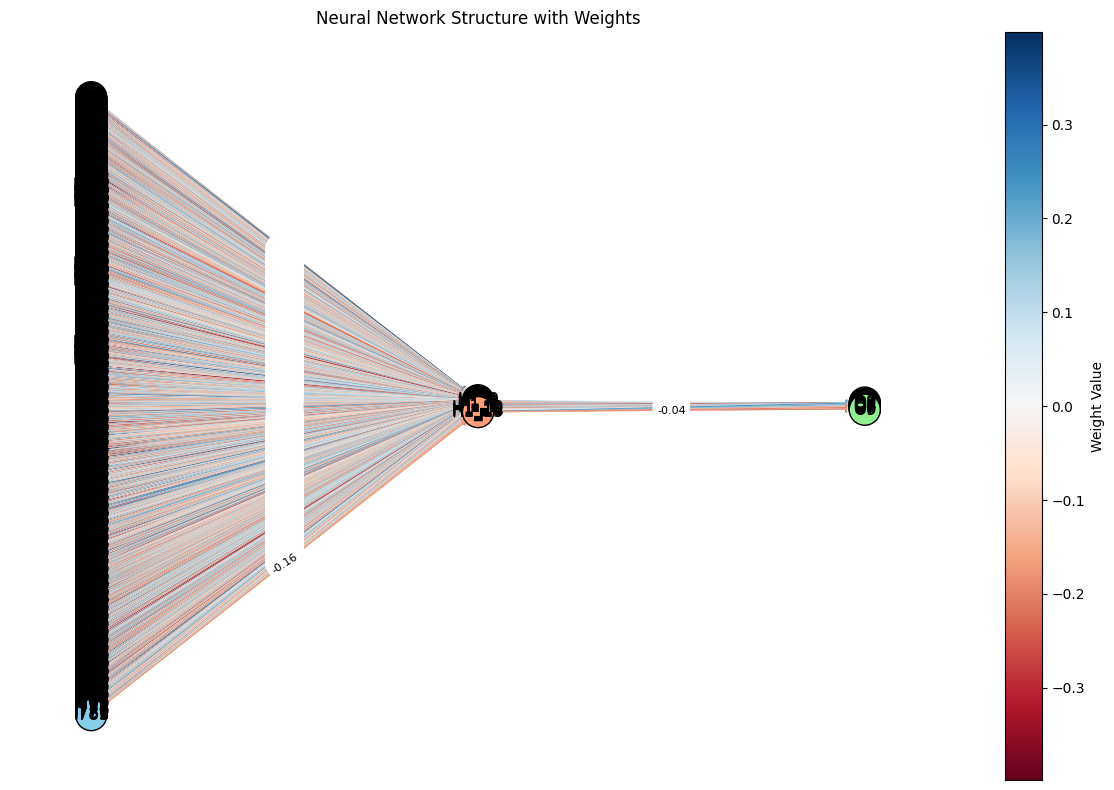


Visualizing initial weight distribution...


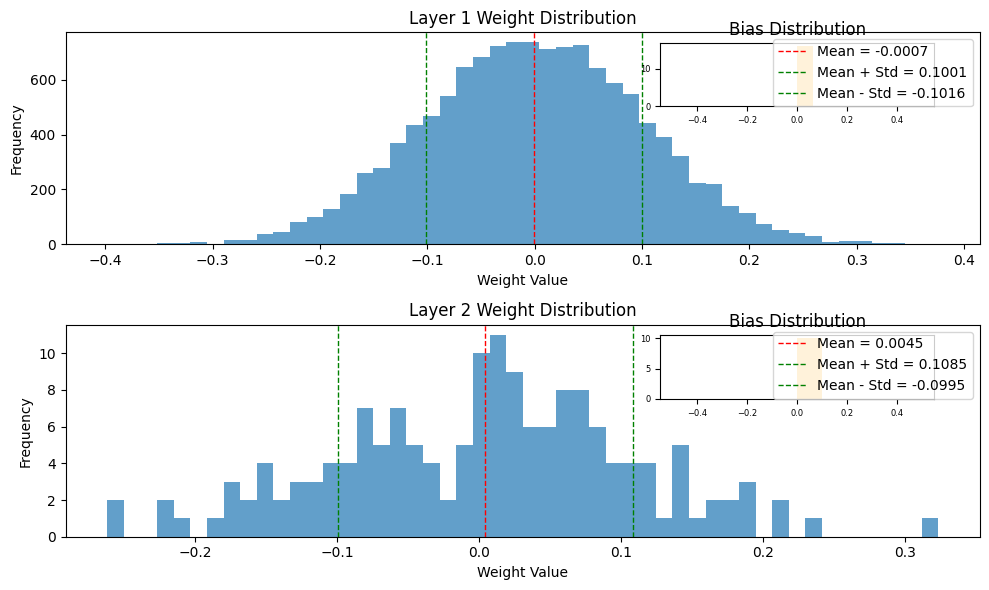

Neural Network Architecture Summary
Total layers: 2

Layer Details:
--------------
Input shape: (784)
  Layer 1: 784 → 16 | Activation: ? | Parameters: 12560
  Layer 2: 16 → 10 | Activation: ? | Parameters: 170

Total trainable parameters: 12730

Training the model...


c:\Users\aland\Desktop\IF3270_Tubes1_57\ffnn\activation.py:75: RuntimeWarning: invalid value encountered in subtract
  exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))


Epoch 1/20 - loss: nan, val_loss: nan
Epoch 2/20 - loss: nan, val_loss: nan
Epoch 3/20 - loss: nan, val_loss: nan
Epoch 4/20 - loss: nan, val_loss: nan
Epoch 5/20 - loss: nan, val_loss: nan
Epoch 6/20 - loss: nan, val_loss: nan
Epoch 7/20 - loss: nan, val_loss: nan
Epoch 8/20 - loss: nan, val_loss: nan
Epoch 9/20 - loss: nan, val_loss: nan
Epoch 10/20 - loss: nan, val_loss: nan
Epoch 11/20 - loss: nan, val_loss: nan
Epoch 12/20 - loss: nan, val_loss: nan
Epoch 13/20 - loss: nan, val_loss: nan
Epoch 14/20 - loss: nan, val_loss: nan
Epoch 15/20 - loss: nan, val_loss: nan
Epoch 16/20 - loss: nan, val_loss: nan
Epoch 17/20 - loss: nan, val_loss: nan
Epoch 18/20 - loss: nan, val_loss: nan
Epoch 19/20 - loss: nan, val_loss: nan
Epoch 20/20 - loss: nan, val_loss: nan
[==============================>]

Evaluating the model on the test set...

Test Accuracy: 0.1026


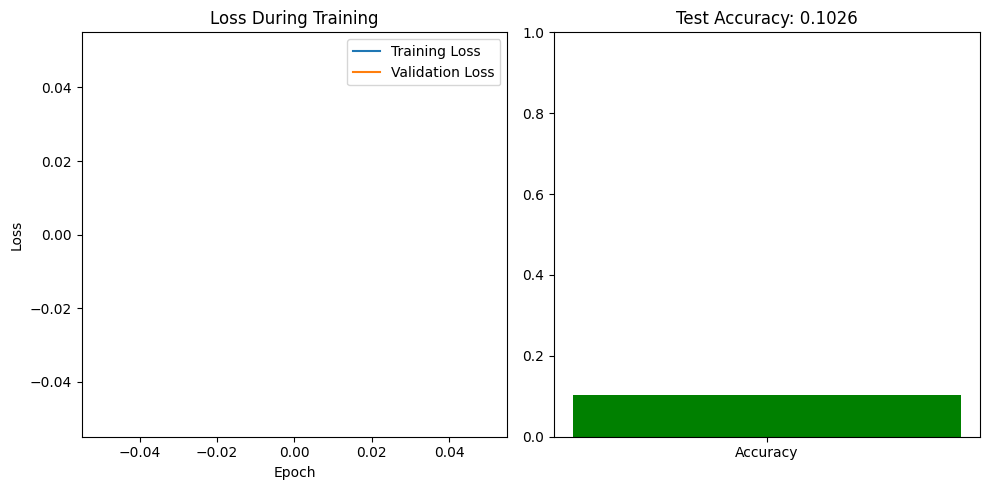


Visualizing trained network structure...


In [ ]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False, parser="auto")

# Shuffle and split data
from sklearn.utils import shuffle
X, y = shuffle(X, y, random_state=42)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train_raw, y_test_raw = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize data
from sklearn.preprocessing import StandardScaler, OneHotEncoder
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# One-hot encode targets
encoder = OneHotEncoder(sparse_output=False)
y_train = encoder.fit_transform(y_train_raw.reshape(-1, 1))
y_test = encoder.transform(y_test_raw.reshape(-1, 1))

# Check data shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Train and evaluate
history, accuracy, model = train_and_evaluate(
    X_train, X_test, y_train, y_test,
    hidden_layers=1, width_per_layer=16,
    epochs=20, learning_rate=0.01
)
